# Stocks Analysis

In this data project we will focus on exploratory data analysis of stock prices.

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section, I have read data from **stooq** using pandas!

'Stooq' is a financial data platform that provides free access to historical stock market data, including stock prices, indices, and other financial instruments.


*Note: [I have installed pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to read stock information directly from the internet.*

### The Imports


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
#!pip install pandas_datareader
from pandas_datareader import data, wb
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

## Data

We will get stock information from Jan 1st 2006 to Jan 1st 2016 for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo


In [7]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [4]:
pip install --upgrade pandas-datareader

In [8]:
# Bank of America
BAC=data.DataReader('BAC','stooq', start, end)

# CitiGroup
C = data.DataReader("C", 'stooq', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'stooq', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'stooq', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'stooq', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'stooq', start, end)

In [9]:
df = data.DataReader(['BAC','C','GS','JPM','MS','WFC'], 'stooq', start, end)

** Create a list of the ticker symbols (as strings) in alphabetical order as 'tickers'**

In [10]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

** Concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list.**

In [11]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

** Set the column name levels.**

In [12]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [13]:
bank_stocks.head()

Bank Ticker      BAC                                                 C  \
Stock Info      Open     High      Low    Close        Volume     Open   
Date                                                                     
2006-01-03   39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.492   
2006-01-04   39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.358   
2006-01-05   39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.843   
2006-01-06   39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.504   
2006-01-09   39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.174   

Bank Ticker                                           ...       MS           \
Stock Info      High      Low    Close        Volume  ...     Open     High   
Date                                                  ...                     
2006-01-03   408.615  398.112  407.891  1.858097e+06  ...  37.4934  38.3558   
2006-01-04   406.325  400.089  400.354  2.260921e+06  ...  38.4971  38.8778   
2006-01-05   403.663  400.520  402.321  1.371893e+06  ...  38.2675  38.4264   
2006-01-06   404.641  398.865  402.321  1.655812e+06  ...  38.5432  38.5922   
2006-01-09   403.329  399.678  400.432  2.031072e+06  ...  38.4470  38.8846   

Bank Ticker                                      WFC                    \
Stock Info       Low    Close        Volume     Open     High      Low   
Date                                                                     
2006-01-03   37.2060  38.2361  6.806387e+06  22.7430  23.0144  22.4559   
2006-01-04   38.2675  38.2675  1.009857e+07  22.8831  22.8979  22.5683   
2006-01-05   38.0448  38.3715  7.313990e+06  22.6690  22.7055  22.5308   
2006-01-06   38.0703  38.4108  8.721337e+06  22.7302  22.8643  22.5920   
2006-01-09   38.4412  38.8120  5.246244e+06  22.7983  22.8979  22.7055   

Bank Ticker                         
Stock Info     Close        Volume  
Date                                
2006-01-03   22.9581  1.530724e+07  
2006-01-04   22.6917  1.510382e+07  
2006-01-05   22.6690  1.407726e+07  
2006-01-06   22.7983  1.167705e+07  
2006-01-09   22.7983  7.808415e+06  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit!

** What is the max Close price for each bank's stock throughout the time period?**

In [14]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info', drop_level=True).max()

Bank Ticker
BAC     46.2013
C      466.8120
GS     203.6910
JPM     57.1634
MS      58.5624
WFC     47.0925
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [15]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [17]:
for tick in tickers:
    returns[tick + ' Returns'] = bank_stocks[tick]['Close'].pct_change()

returns.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010633,-0.018478,-0.013704,-0.014304,0.000821,-0.011604
2006-01-05,0.001329,0.004913,-0.000364,0.003130,0.002718,-0.001000
2006-01-06,-0.001549,0.000000,0.013995,0.007061,0.001024,0.005704
2006-01-09,0.000674,-0.004695,0.012026,0.016240,0.010445,0.000000


Morgan Stanley is more volatile stock as compared to others.

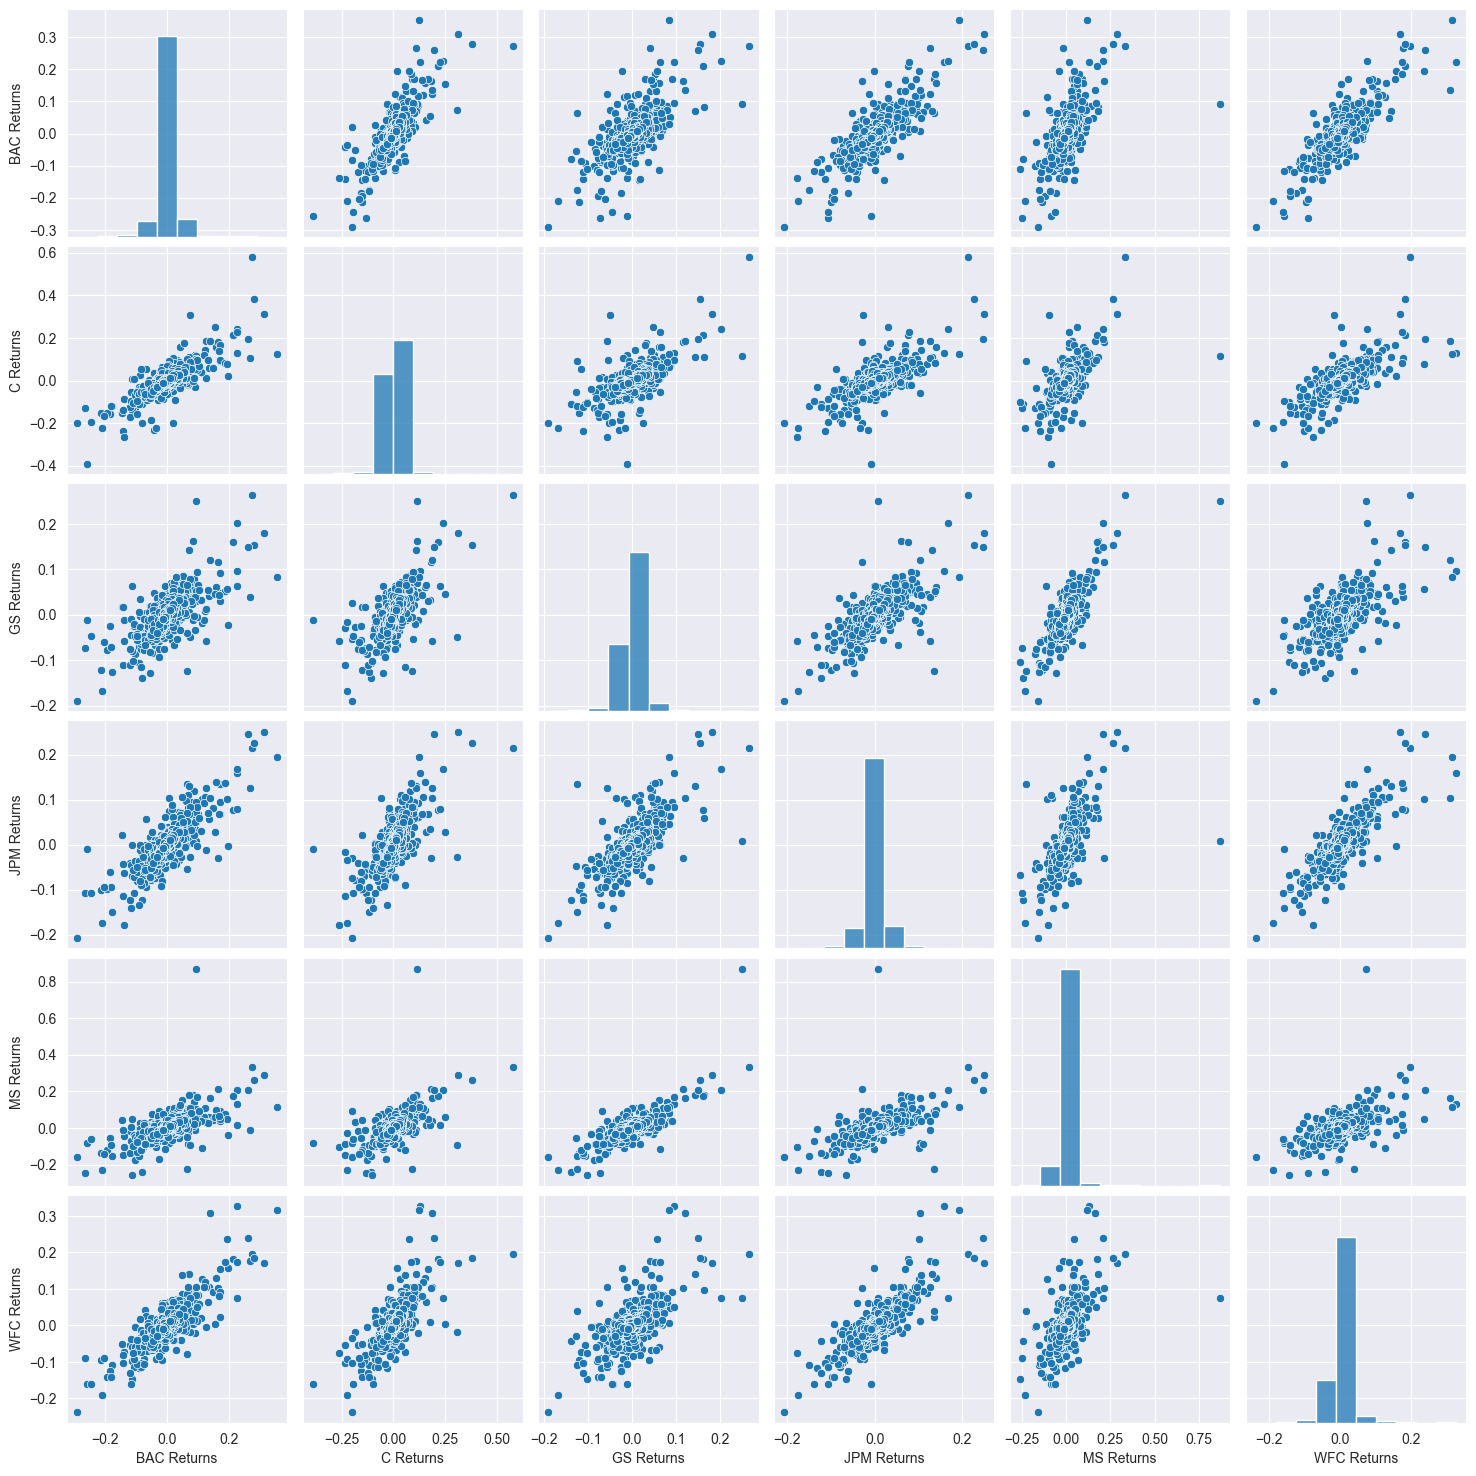

In [19]:
sns.pairplot(data = returns[1:], diag_kind='hist', diag_kws={'bins': 10})
sns.set_style('darkgrid')



Bank of America, Goldeman Sachs, JP Morgan Chase and Wells Fargo had seen the worst drop on same day (2009-01-20). It might be due to MSCI world index falling by 1%.

In [86]:
returns.idxmin()

BAC Returns   2009-01-20
C Returns     2009-02-27
GS Returns    2009-01-20
JPM Returns   2009-01-20
MS Returns    2008-10-09
WFC Returns   2009-01-20
dtype: datetime64[ns]

Goldeman Sachs observed worst dip on 20 Jan 2009 and jumped back to it's all time high the very next day.

In [20]:
returns.idxmax()

BAC Returns   2009-04-09
C Returns     2008-11-24
GS Returns    2008-11-24
JPM Returns   2009-01-21
MS Returns    2008-10-13
WFC Returns   2008-07-16
dtype: datetime64[ns]

Morgan Stanley seem to be the riskiest stock in 2008.

In [90]:
returns.std()

BAC Returns    0.036605
C Returns      0.038615
GS Returns     0.025371
JPM Returns    0.027670
MS Returns     0.037708
WFC Returns    0.030221
dtype: float64

In [117]:
returns.loc['2008-01-01':'2008-12-31'].std()

BAC Returns    0.062928
C Returns      0.073492
GS Returns     0.050116
JPM Returns    0.053133
MS Returns     0.087620
WFC Returns    0.052414
dtype: float64

Text(0.0, 1.0, 'Morgan Stanley Returns')

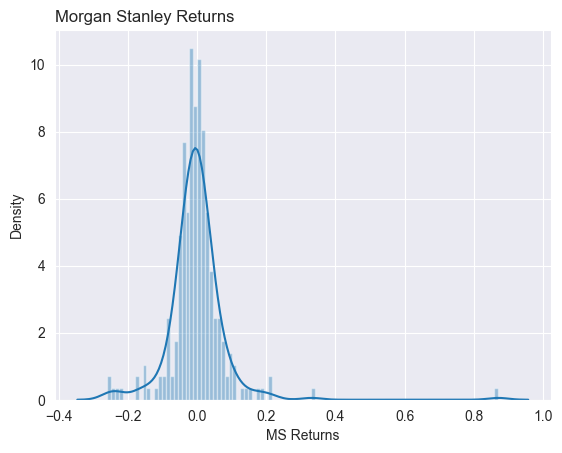

In [26]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['MS Returns'], bins=100)
plt.title('Morgan Stanley Returns', loc='left')

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

Text(0.0, 1.0, 'City Group Returns')

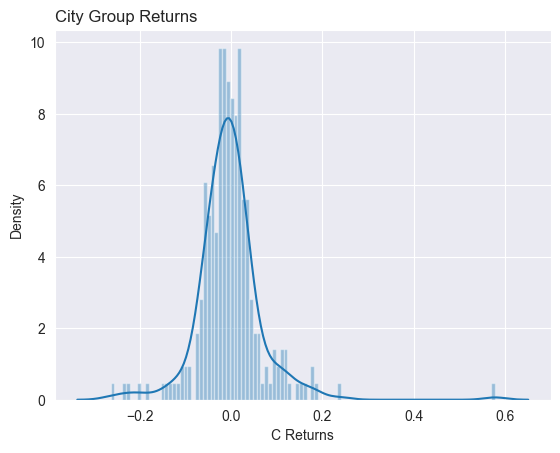

In [24]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Returns'], bins=100)
plt.title('City Group Returns', loc = 'left')

____
# More Visualization


### Imports

In [27]:
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

The closing prices of each bank were compared, revealing that City Group experienced a decline starting in mid-2007, which continued until the beginning of 2009. Since then, it has remained within a consistent range.

Text(0.0, 1.0, 'Closing Price YoY Trend')

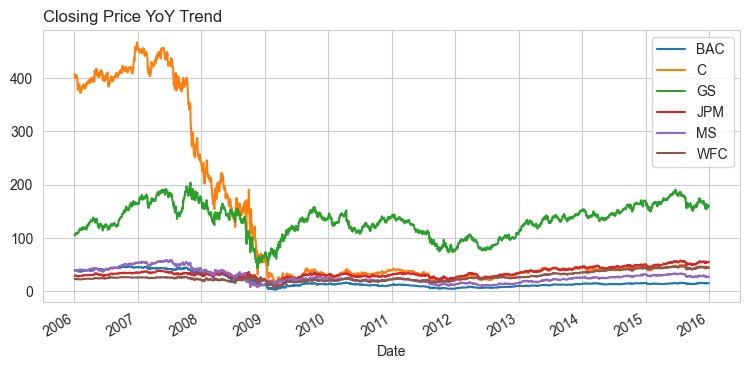

In [29]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize = (9,4))
plt.legend(tickers)
plt.title('Closing Price YoY Trend', loc='left')

Below is a similar visualization, but with enhanced interactivity.

In [154]:
bank_stocks.xs(key='Close',axis=1, level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

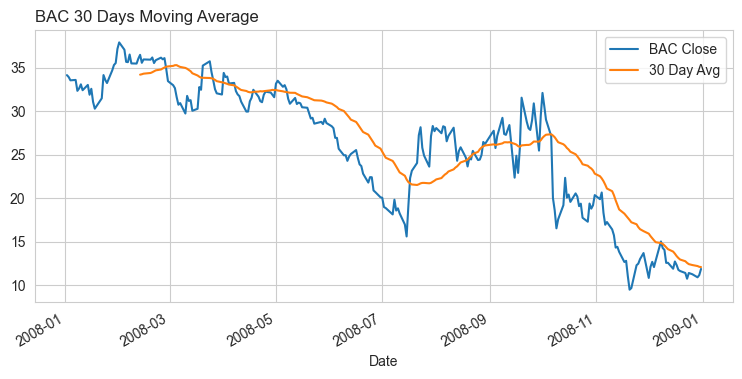

In [257]:
plt.figure(figsize=(9,4))
bank_stocks['BAC']['Close']['2008'].plot(label='BAC Close')
bank_stocks['BAC']['Close']['2008'].rolling(30).mean().plot(label='30 Day Avg')
plt.title('BAC 30 Days Moving Average', loc='left')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

Wells Fargo and JP Morgan Chase is highly correlated.

Text(0.0, 1.0, 'Correlation between Close prices')

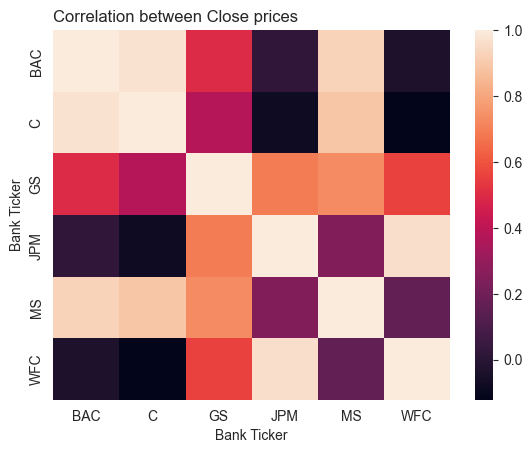

In [259]:
sns.heatmap(bank_stocks.xs(key='Close', level='Stock Info', axis=1).corr(),
            annot=False)
plt.title('Correlation between Close prices', loc='left')

** Use seaborn's clustermap to cluster the correlations together:**

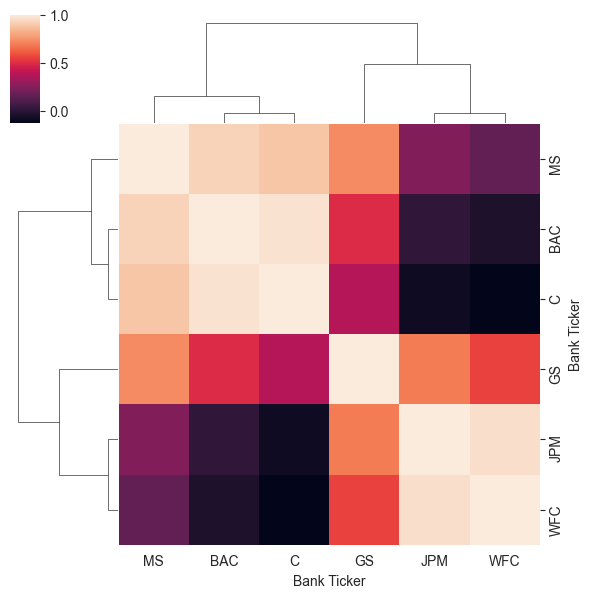

In [264]:
sns.clustermap(bank_stocks.xs(key='Close', level='Stock Info', axis=1).corr(),figsize=(6,6))

# Part 2

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots.

In [285]:
import cufflinks as cf

data = bank_stocks['BAC'].loc['2015-01-01':'2016-01-01'][['Open', 'High', 'Low', 'Close']]

# Create the candlestick plot
data.iplot(kind='candle', title='Candlestick Plot for BAC (2015-01-01 to 2016-01-01)', xTitle='Date', yTitle='Price')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [298]:
bank_stocks['BAC'].loc['2015-01-01':'2016-01-01']['Close'].ta_plot(study='sma')

** Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [290]:
bank_stocks['BAC'].loc['2015-01-01':'2016-01-01']['Close'].ta_plot(study='boll')

# Thank You!